# E-Commerce Customer Segmentation

## Load the dataset

In [ ]:
#Import Dataset
import pandas as pd
df = pd.read_csv('OnlineRetail.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Initial Analysis
df.info()
print(df.shape)
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
(541909, 8)


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##Exploratory Data Analysis

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['CustomerID'], inplace=True)
print("Dataset's shape after dropping the nan-values: ", df.shape)

Dataset's shape after dropping the nan-values:  (401604, 8)


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['Total']=df['Quantity']*df['UnitPrice']

print("Dataset's shape after cleaning:",df.shape)
print('='*40)
print(df.info())

Dataset's shape after cleaning: (392692, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   Total        392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB
None


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


In [ ]:
df.to_csv('df_cleaned.csv', index=False)

RFM Method

In [ ]:
latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total': 'sum'
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total': 'Monetary'
}, inplace=True)

rfm_data = rfm.reset_index()
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


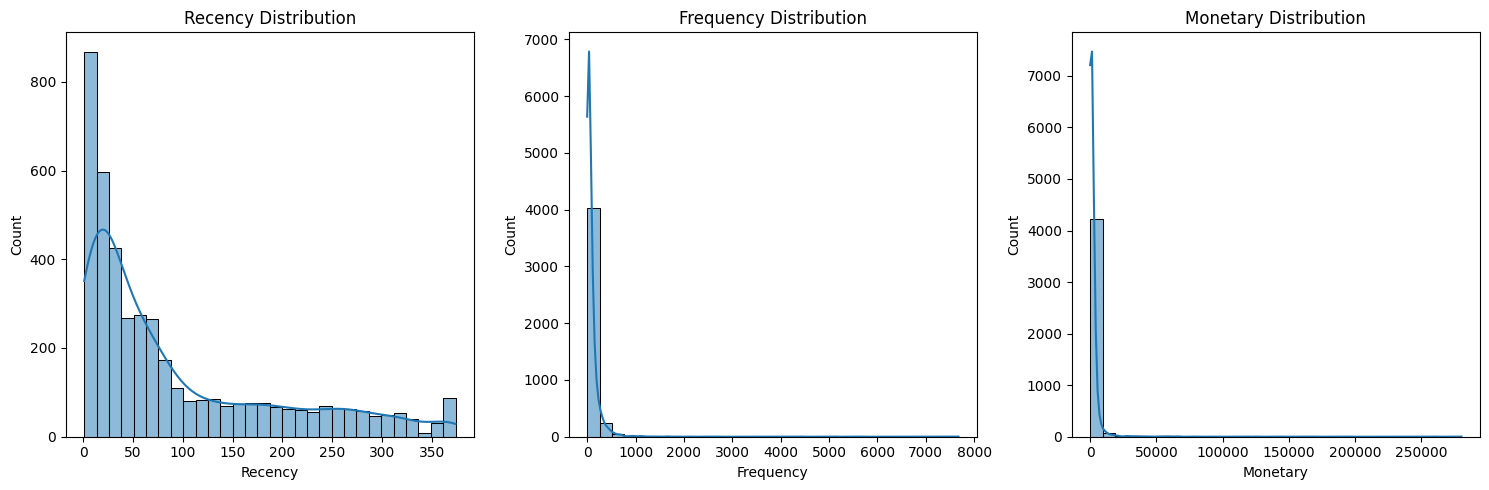

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram plot
plt.figure(figsize=(15, 5))

# Recency plot
plt.subplot(1, 3, 1)
sns.histplot(rfm_data['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')

# Frequency plot
plt.subplot(1, 3, 2)
sns.histplot(rfm_data['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')

# Monetary plot
plt.subplot(1, 3, 3)
sns.histplot(rfm_data['Monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

rfm_log = rfm_data.copy()

rfm_log['R_log'] = np.log1p(rfm_log['Recency'])
rfm_log['F_log'] = np.log1p(rfm_log['Frequency'])
rfm_log['M_log'] = np.log1p(rfm_log['Monetary'])

scaler = StandardScaler()

feature_to_scale = ['R_log', 'F_log', 'M_log']
rfm_scaled = scaler.fit_transform(rfm_log[feature_to_scale])

rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=feature_to_scale, index=rfm_log.index)
rfm_scaled_df.head()

,R_log,F_log,M_log
0,1.461993,-2.438202,3.707716
1,-2.038734,1.188986,1.414903
2,0.373104,-0.211465,0.720024
3,-0.623086,0.461819,0.702287
4,1.424558,-0.673554,-0.614514


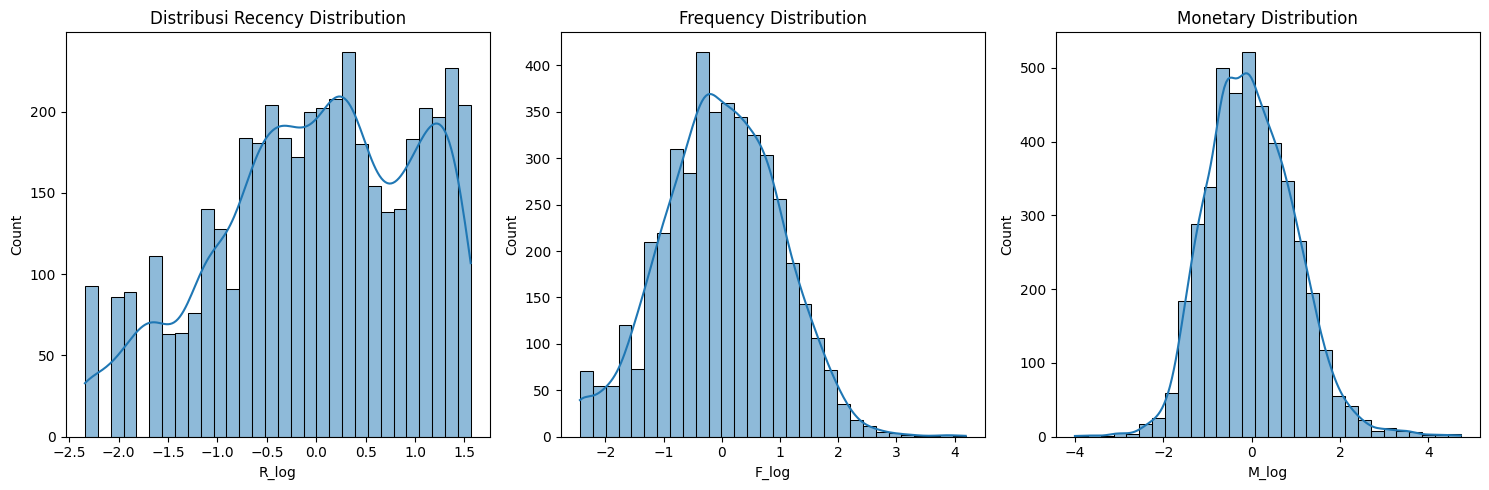

In [ ]:
# Histogram Plots
plt.figure(figsize=(15, 5))

# Recency plot
plt.subplot(1, 3, 1)
sns.histplot(rfm_scaled_df['R_log'], bins=30, kde=True)
plt.title('Distribusi Recency Distribution')

# Frequency plot
plt.subplot(1, 3, 2)
sns.histplot(rfm_scaled_df['F_log'], bins=30, kde=True)
plt.title('Frequency Distribution')

# Monetary plot
plt.subplot(1, 3, 3)
sns.histplot(rfm_scaled_df['M_log'], bins=30, kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

K Means elbow method

Text(0.5, 1.0, 'Elbow Method for Optimal k')

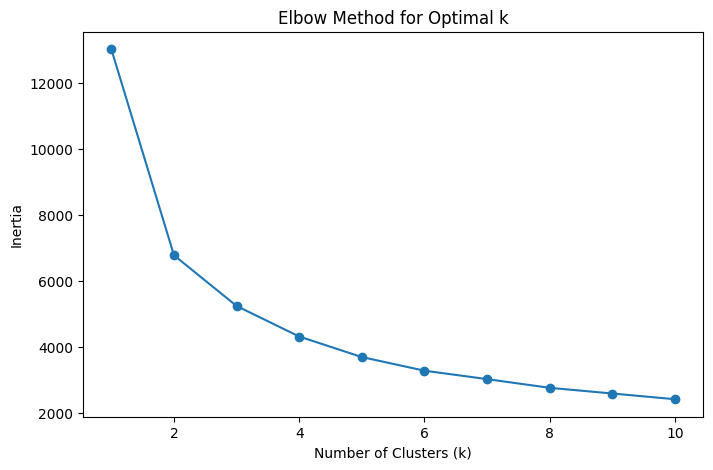

In [ ]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(rfm_scaled_df)
rfm_data['Cluster'] = kmeans.labels_
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,0
1,12347.0,2,182,4310.00,2
2,12348.0,75,31,1797.24,0
3,12349.0,19,73,1757.55,0
4,12350.0,310,17,334.40,3


In [ ]:
cluster_analysis = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
    'CustomerID': 'count'
}).reset_index().sort_values(('Monetary', 'mean'), ascending=False)

print(cluster_analysis)

  Cluster     Recency   Frequency     Monetary       CustomerID
                 mean        mean         mean count      count
2       2   12.951389  280.150463  7053.144502   864        864
0       0   95.910802   79.117021  1513.088332  1222       1222
1       1   19.688506   38.266667   612.658610   870        870
3       3  185.167149   14.955861   297.601383  1382       1382


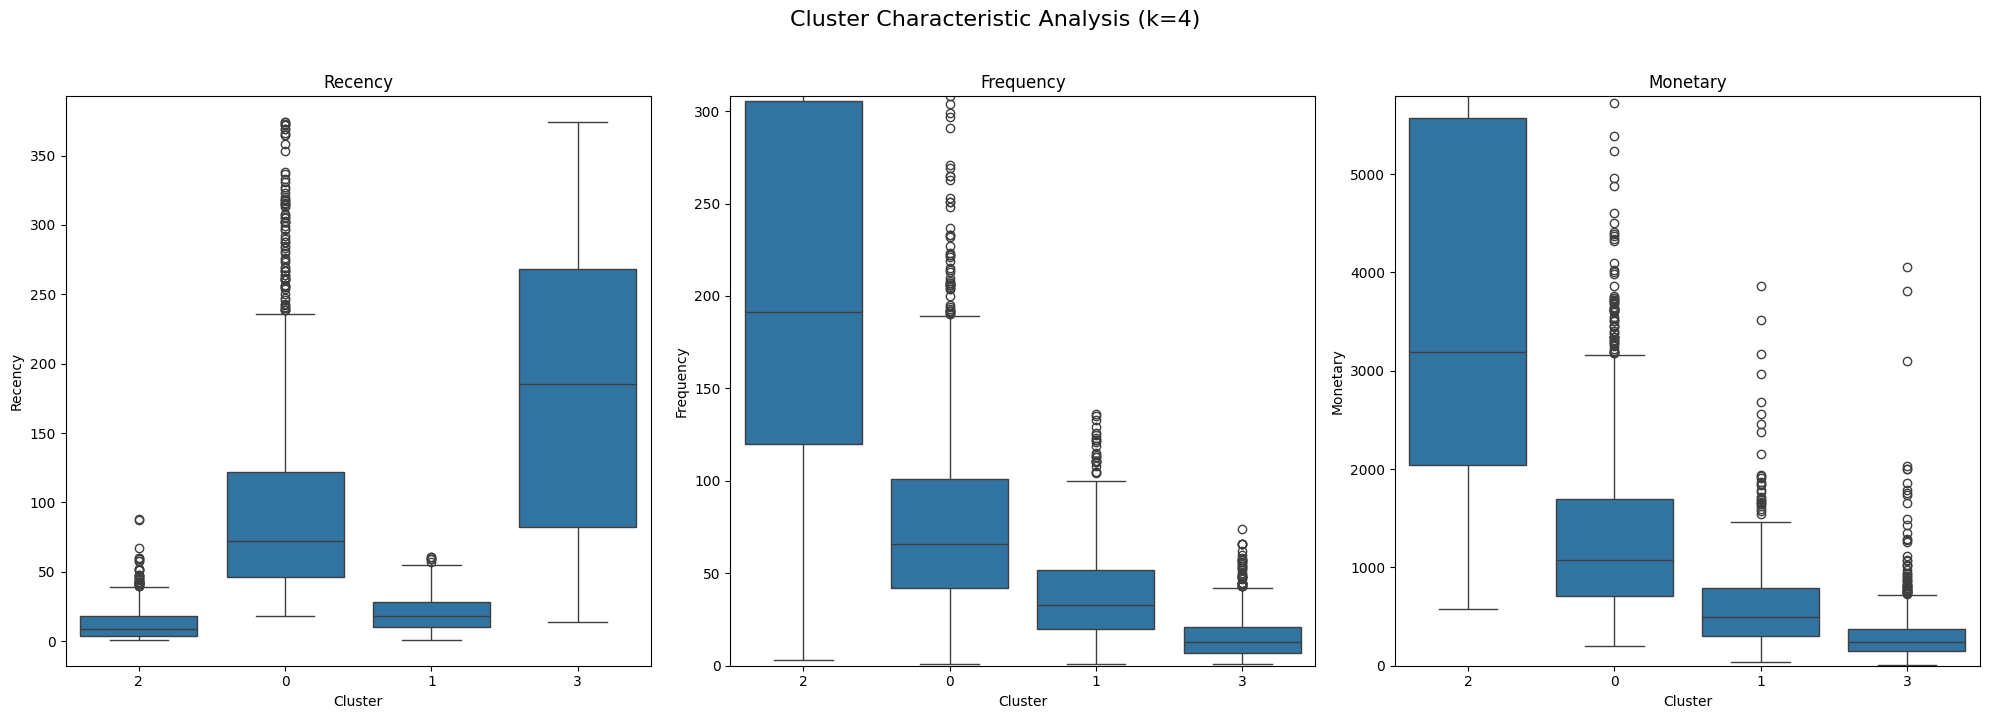

In [ ]:
plt.figure(figsize=(20, 7))

cluster_order = cluster_analysis['Cluster']

# Recency Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Recency', data=rfm_data, order=cluster_order)
plt.title('Recency')

# Frequency Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Frequency', data=rfm_data, order=cluster_order)
plt.title('Frequency')
plt.ylim(0, rfm_data['Frequency'].quantile(0.95))

# Monetary Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Monetary', data=rfm_data, order=cluster_order)
plt.title('Monetary')
plt.ylim(0, rfm_data['Monetary'].quantile(0.95))

plt.suptitle('Cluster Characteristic Analysis (k=4)', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('cluster_boxplots_k4.png')
plt.show()

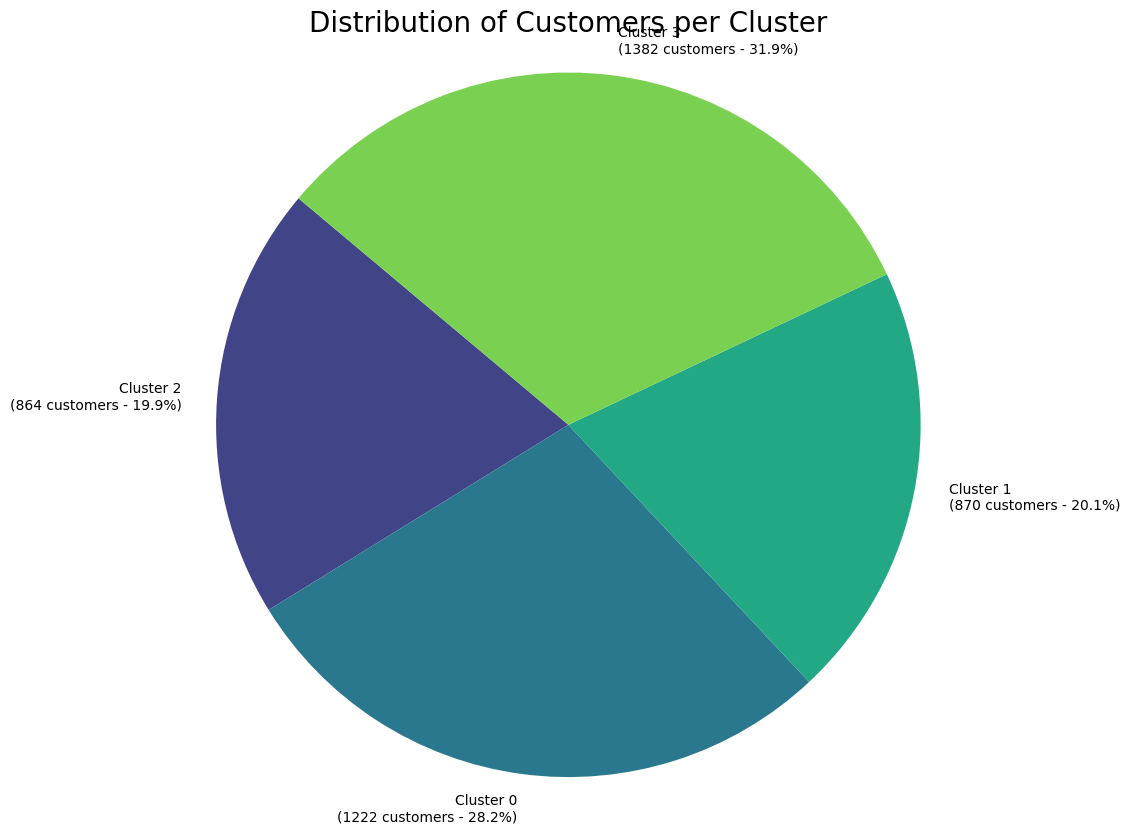

In [ ]:
# --- Plot 3: Distribusi Ukuran Cluster (Pie Plot) ---
plt.figure(figsize=(10, 10)) # Increase figure size for better readability

# Menggunakan data dari cluster_analysis
cluster_counts = cluster_analysis[('CustomerID', 'count')]
cluster_labels = cluster_analysis['Cluster']
total_customers = cluster_counts.sum()

plt.pie(
    cluster_counts,
    labels=[f'Cluster {label}\n({count} customers - {count/total_customers:.1%})' for label, count in zip(cluster_labels, cluster_counts)], # Label dengan jumlah pelanggan dan persentase
    autopct='', # Remove default autopct
    startangle=140, # Sudut awal plot
    colors=sns.color_palette('viridis', len(cluster_labels)) # Use a different color palette
)

plt.title('Distribution of Customers per Cluster', fontsize=20) # Add a more descriptive title
plt.axis('equal')  # Memastikan plot lingkaran
plt.show()

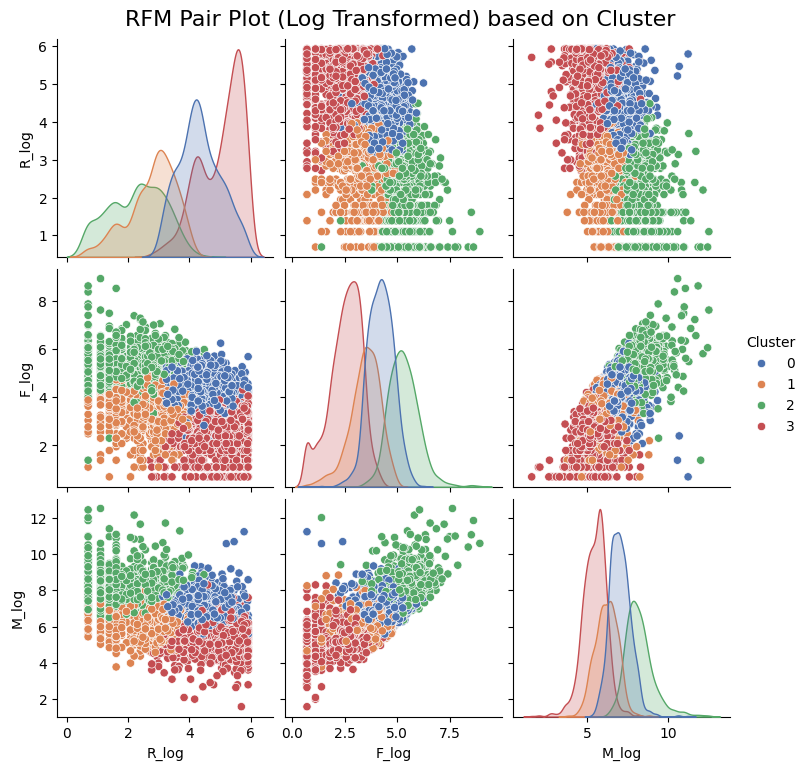

In [ ]:
# Pair-Plot
rfm_log['Cluster'] = rfm_data['Cluster']

sns.pairplot(
    rfm_log,
    vars=['R_log', 'F_log', 'M_log'],
    hue='Cluster',
    palette='deep',
    diag_kind='kde'
)

plt.suptitle('RFM Pair Plot (Log Transformed) based on Cluster', y=1.02, fontsize=16)
plt.savefig('cluster_pairplot_k4.png')
plt.show()

In [ ]:
rfm_data.to_csv('rfm_data.csv', index=False)